In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt#to plot accuracy
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split #to split training and testing data
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [70]:
data = []
labels = []
classes = 43
cur_path = "./myData"
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/' + a)
            image = image.resize((32,32))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [71]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)

(16979, 32, 32, 3) (16979,)
(13583, 32, 32, 3) (3396, 32, 32, 3) (13583,) (3396,)


In [72]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

c:\Users\alii2\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [73]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_t1, y_t1, batch_size=32, epochs=10, validation_data=(X_t2, y_t2))


Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.1202 - loss: 5.6796 - val_accuracy: 0.7674 - val_loss: 1.1262
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5832 - loss: 1.4841 - val_accuracy: 0.8804 - val_loss: 0.5075
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7562 - loss: 0.8349 - val_accuracy: 0.9022 - val_loss: 0.3630
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8254 - loss: 0.5849 - val_accuracy: 0.9644 - val_loss: 0.1549
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8744 - loss: 0.4123 - val_accuracy: 0.9741 - val_loss: 0.0964
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9035 - loss: 0.3163 - val_accuracy: 0.9791 - val_loss: 0.0927
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9047 - loss: 0.3185 - val_accuracy: 0.9785 - val_loss: 0.0919
Epoch 8/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9195 - loss: 0.2588 - val_accu

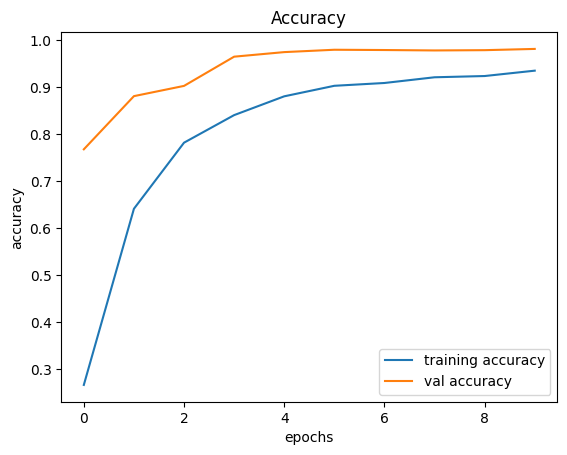

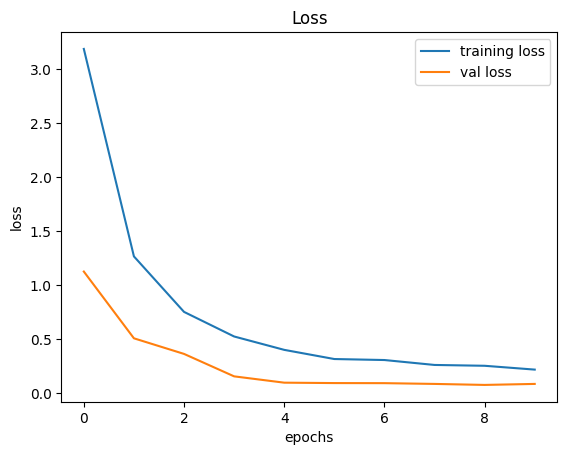

In [74]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [75]:
y_pred=model.predict(X_t2)

pred_class=np.argmax(y_pred,axis=1)
pred_class

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([24, 13, 30, ..., 38, 19, 34], dtype=int64)

In [76]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_t2,pred_class)

Text(0.5, 1.0, 'Confusion Matrix')

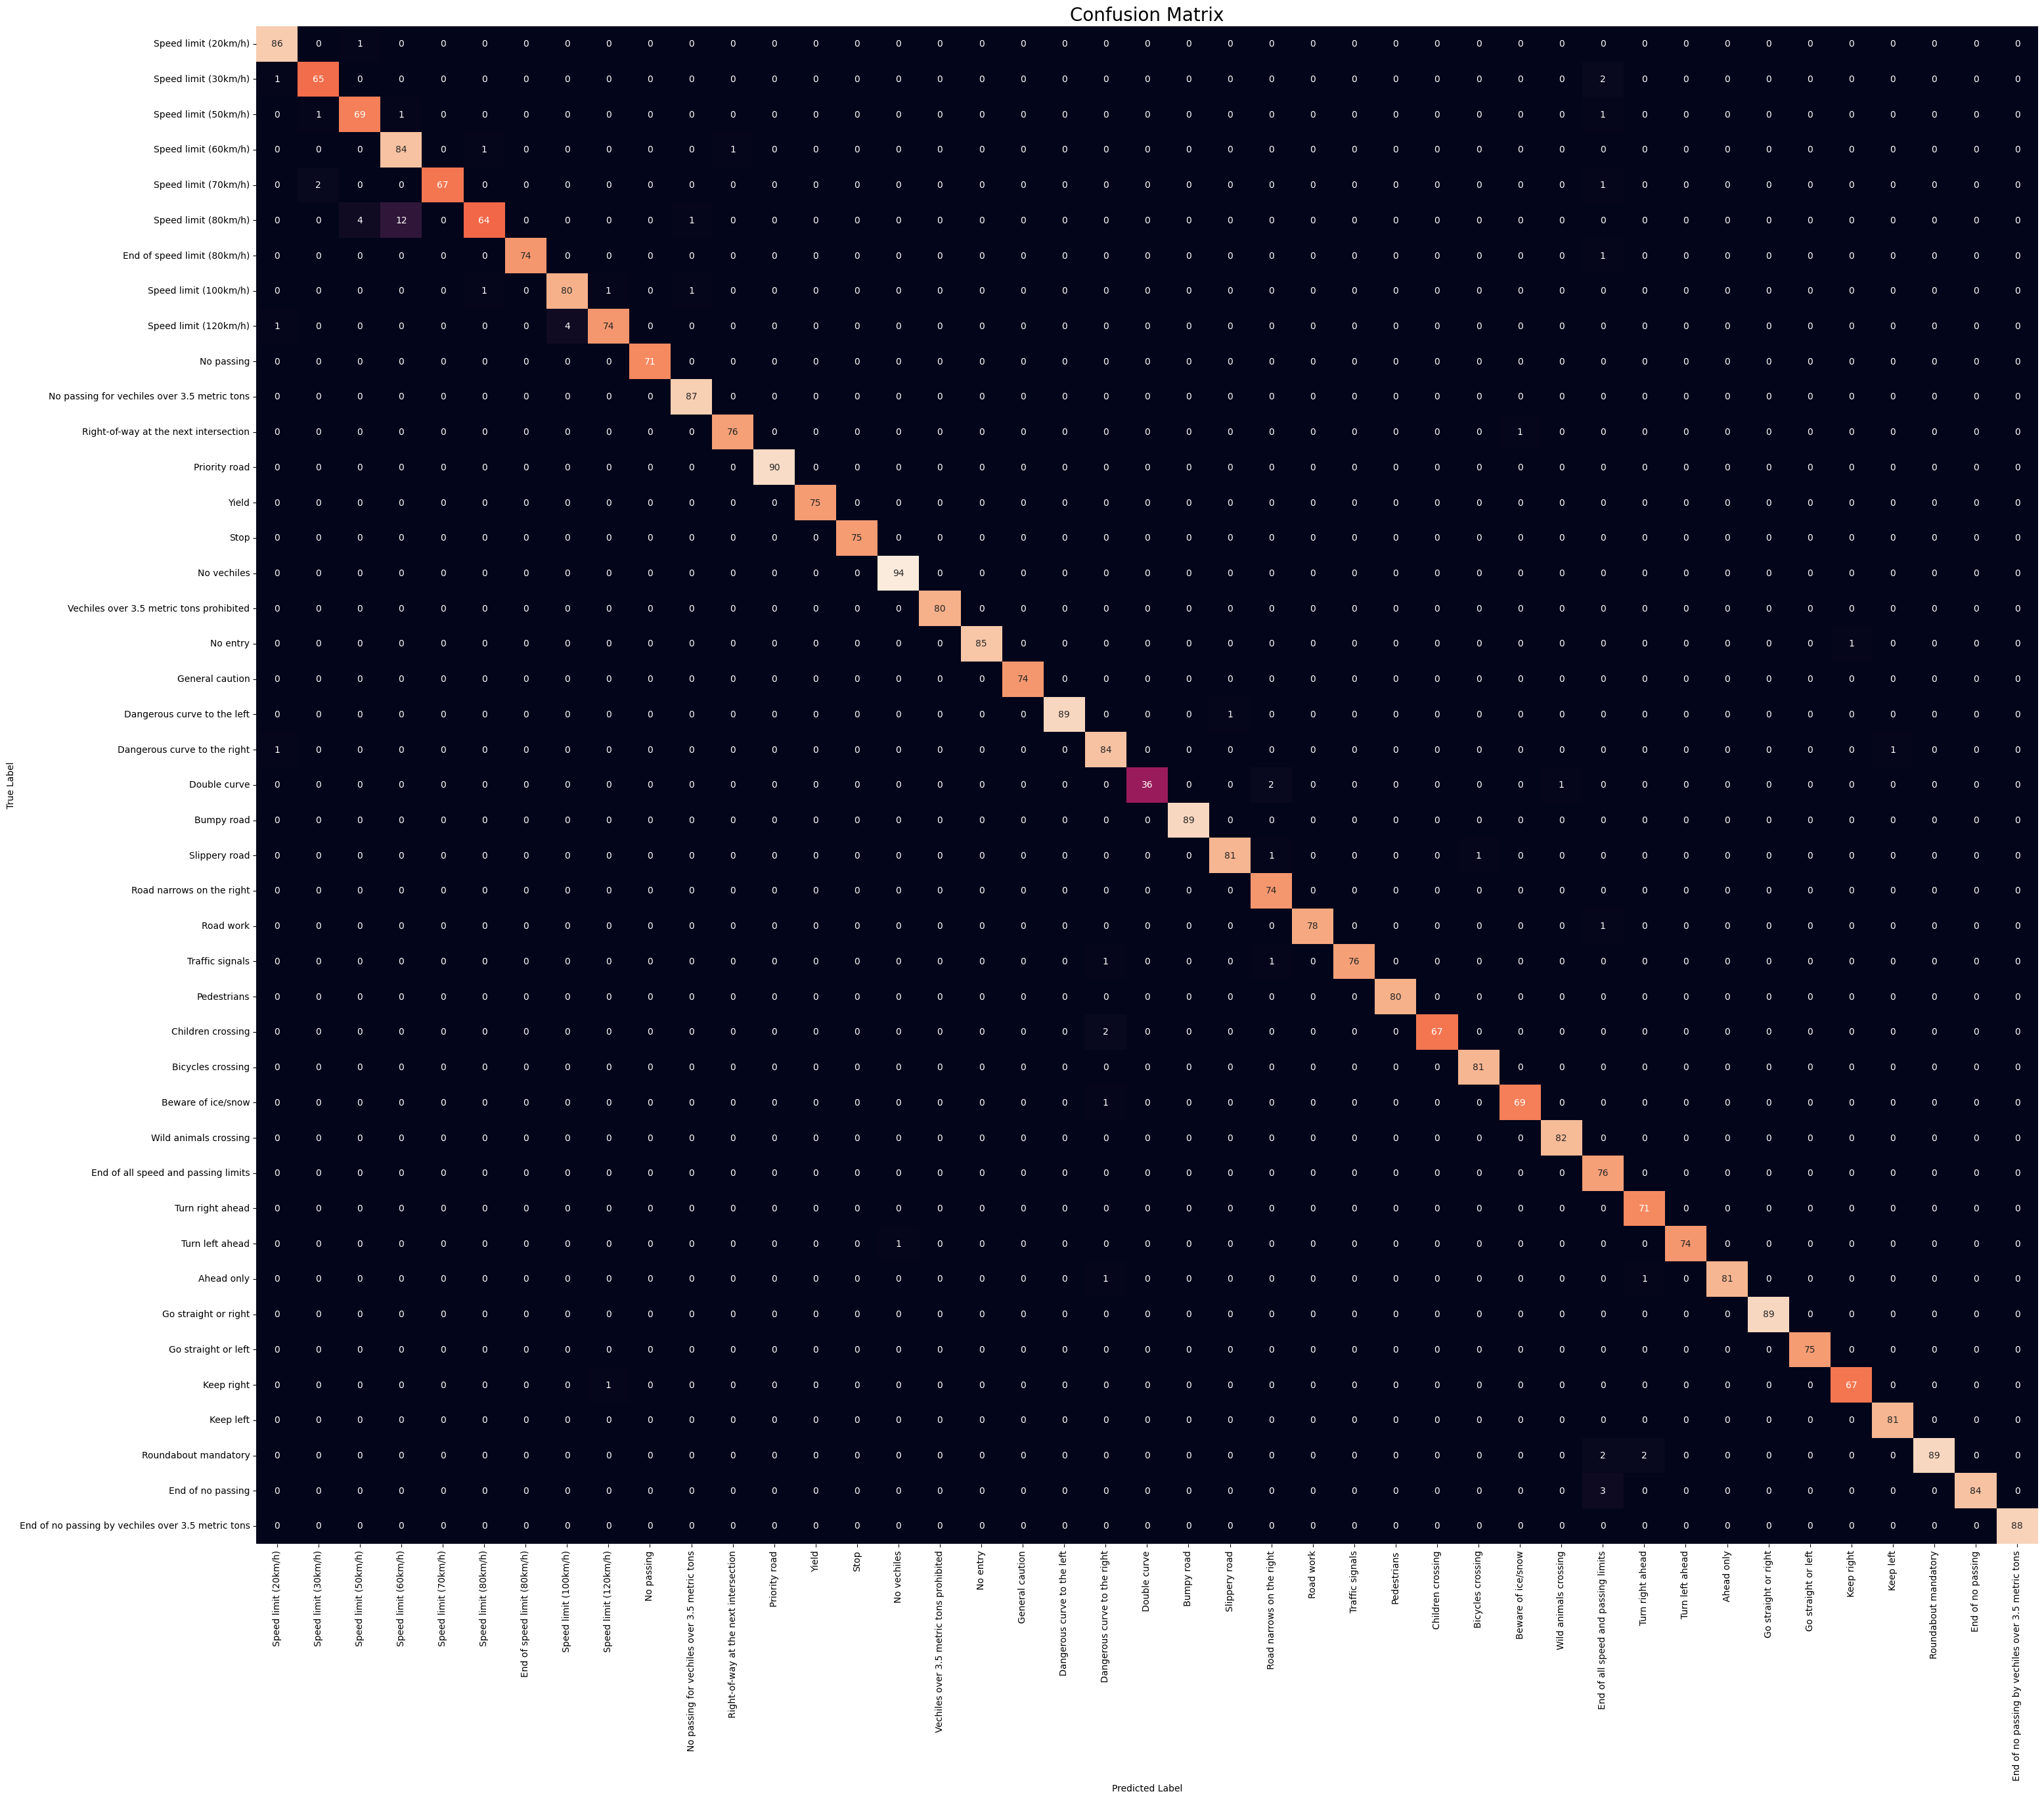

In [77]:
import seaborn as sns

labels=pd.read_csv("./labels.csv")

plt.subplots(figsize=(35,30)) 
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels["Name"],yticklabels=labels["Name"],cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix", fontsize=20)

In [78]:
model.save("model1.h5")
